# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [1]:
import urllib.request
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7ff3be44f670>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.896.jpg', 'cat.897.jpg', 'cat.898.jpg', 'cat.899.jpg', 'cat.900.jpg', 'cat.901.jpg', 'cat.902.jpg', 'cat.903.jpg', 'cat.904.jpg', 'cat.905.jpg']
['dog.896.jpg', 'dog.897.jpg', 'dog.898.jpg', 'dog.899.jpg', 'dog.900.jpg', 'dog.901.jpg', 'dog.902.jpg', 'dog.903.jpg', 'dog.904.jpg', 'dog.905.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de trenes y validación:

In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuronal convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [6]:
import tensorflow as tf
# tu código para la red neuronal del ejercicio 1 aquí
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

2022-08-21 19:30:26.479805: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-21 19:30:26.495607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 19:30:26.495617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-21 19:30:28.311828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-21 19:30:28.311839: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to c

Se comprueba el modelo:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        1

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [8]:
# tu código para la compilación del ejercicio 2 aquí
model.compile(loss='binary_crossentropy',
            optimizer='RMSprop',
            metrics=['accuracy'])

# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [10]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí
history = model.fit(
    train_generator,
    epochs=40,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)

Epoch 1/40
100/100 - 11s - loss: 0.7369 - accuracy: 0.5010 - val_loss: 0.6822 - val_accuracy: 0.5890 - 11s/epoch - 114ms/step
Epoch 2/40
100/100 - 11s - loss: 0.6720 - accuracy: 0.6005 - val_loss: 0.5952 - val_accuracy: 0.6920 - 11s/epoch - 108ms/step
Epoch 3/40
100/100 - 12s - loss: 0.5917 - accuracy: 0.6815 - val_loss: 0.6034 - val_accuracy: 0.6720 - 12s/epoch - 118ms/step
Epoch 4/40
100/100 - 12s - loss: 0.5445 - accuracy: 0.7305 - val_loss: 0.5722 - val_accuracy: 0.6990 - 12s/epoch - 123ms/step
Epoch 5/40
100/100 - 13s - loss: 0.4686 - accuracy: 0.7860 - val_loss: 0.5456 - val_accuracy: 0.7160 - 13s/epoch - 127ms/step
Epoch 6/40
100/100 - 13s - loss: 0.4079 - accuracy: 0.8215 - val_loss: 0.5782 - val_accuracy: 0.7170 - 13s/epoch - 127ms/step
Epoch 7/40
100/100 - 13s - loss: 0.3360 - accuracy: 0.8490 - val_loss: 0.5969 - val_accuracy: 0.7310 - 13s/epoch - 129ms/step
Epoch 8/40
100/100 - 13s - loss: 0.2690 - accuracy: 0.8865 - val_loss: 0.6766 - val_accuracy: 0.7200 - 13s/epoch - 130

# 4. Evaluando la precisión y la perdida del modelo


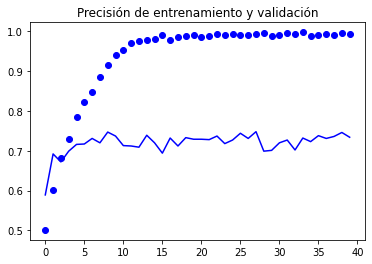

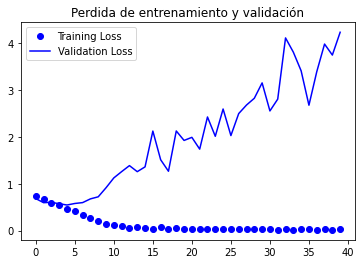

In [11]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

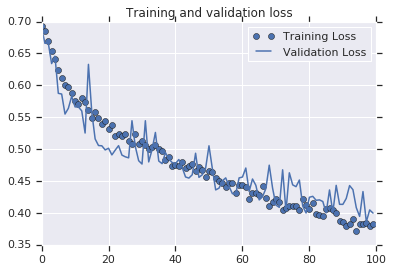
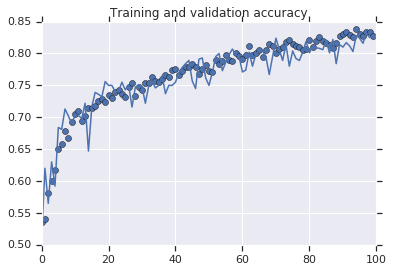

# 5. Corrección

Primero se mejora el generador de imágenes. Este generador es muy popular, es usado incluso en el material de clase del curso. Permite tener diversas variantes de la misma imagen.

In [12]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###
# Importar todas las librerías necesarias para esta sección
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import gc
import numpy as np
import tensorflow as tf

In [13]:
# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.7,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=40,
    brightness_range=[0.8,1.2],
    fill_mode="nearest"
    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Para examinar los resultados de este ejercicio se usará la herramienta `TensorBoard`, que permite generar gráficas mientras aprende la red neuronal. Además, permite comparar fácilmente los gráficos obtenidos.

Ahora mismo TensorBoard muestra los resultados de la presente práctica, mismos que serán sobreescritos si se ejecutan los modelos posteriores a la siguiente celda.

In [14]:
# Iniciar tensorboard
# Se creará una ventana, podrá seguir desde ahí el avance de los modelos.
# Se pueden observar los detalles con mayor comodidad en http://localhost:6006
%load_ext tensorboard
%tensorboard --logdir out/logs

Se crean algunos callbacks que sirven para que TensorBoard registre la información con la cual funcionará.

In [15]:
# Callbacks para el uso de tensorboard
cb_m0 = tf.keras.callbacks.TensorBoard(log_dir='out/logs/m0', histogram_freq=1)
cb_m1 = tf.keras.callbacks.TensorBoard(log_dir='out/logs/m1', histogram_freq=1)

## Modelo 0 o modelo de referencia

Primero se probará la misma red neuronal con el nuevo aumento de datos y se observará cual su mejora.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        1

Al llamar la función `fit()`, cambiará la sustitución del parámetro `verbose` por un callback para TensorBoard y el número de épocas se eleva a 100, valor que servirá para observar un comportamiento para establecer un mejor valor.

In [17]:
history0 = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[cb_m0])

Epoch 1/100
20/20 [==============================] - 11s 537ms/step - loss: 1.0812 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 11s 570ms/step - loss: 0.6923 - accuracy: 0.5095 - val_loss: 0.6889 - val_accuracy: 0.5600
Epoch 3/100
20/20 [==============================] - 12s 606ms/step - loss: 0.6931 - accuracy: 0.5385 - val_loss: 0.6871 - val_accuracy: 0.5050
Epoch 4/100
20/20 [==============================] - 13s 640ms/step - loss: 0.6850 - accuracy: 0.5745 - val_loss: 0.8649 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 13s 657ms/step - loss: 0.6959 - accuracy: 0.5650 - val_loss: 0.6734 - val_accuracy: 0.6060
Epoch 6/100
20/20 [==============================] - 14s 707ms/step - loss: 0.6743 - accuracy: 0.5670 - val_loss: 0.6537 - val_accuracy: 0.6140
Epoch 7/100
20/20 [==============================] - 15s 735ms/step - loss: 0.6844 - accuracy: 0.5870 - val_loss: 0.6446 - val_accuracy:

## Método: Iteración de modelos

Ahora se recurre al método "prueba-error". Se ha implementado un código que permite generar 27 modelos con distinto número de capas de convolución y capas totalmente conectadas. Se producirán 27 modelos basados en el Modelo 0, y se elegirá el mejor. La desventaja de este método es primeramente el tiempo que tomará entrenar todos los modelos generados, y segundo, no todas las combinaciones son tomadas en cuenta, por ejemplo, cada capa de todos los modelos tendrá siempre el mismo número de neuronas, sin distinción.

Se ha limitado a 128 neuronas porque más allá de dicho valor se vuelve un modelo inviable para la ejecución en el equipo disponible. De hecho se observará que aquellos métodos con 128 neuronas y una o más capas totalmente conectadas no pudieron generarse por falta de memoria, por lo que serán descartados.

Además, se definen dos callbacks para revisar cuanto mejora el modelo en cada época y no exceder el uso del hardware en vano. Definiremos un callback para la precisión y otro para la perdida. Cada uno revisa las últimas veinticinco épocas y determina si el modelo ha dejado de mejorar, se debe mejorar al menos en 0.001 entre esas veinticinco épocas.

In [18]:
es_accu = EarlyStopping(monitor='val_accuracy', patience=25,min_delta=0.001,mode='max',verbose=0)
es_loss = EarlyStopping(monitor='val_loss',patience=25,min_delta=0.001,mode='min',verbose=0)

In [ ]:
############################################################################
#                     IMPORTANTE: LEER ANTES DE EJECUTAR                   #
############################################################################
# Ejecute este código con precaución porque sobreescribe los resultados
# que ahora muestra TensorBoard. Además el tiempo de ejecución es muy largo.
# Puede saturar la memoria del equipo.
num_dense_l = [0, 1, 2]
num_neurons = [32, 64, 128]
convolutions = [1, 2, 3]

for layer in num_dense_l:
    for neuron in num_neurons:
        for convolution in convolutions:
            # Crear un nombre para el log de TensorBoard
            ln = "{}-convolutions-{}-neurons-{}-layers".format(convolution, neuron, layer)
            print("Inicia red:",ln)
            # Se inicia el modelo
            model = tf.keras.models.Sequential()
            # Esta capa es obligatoria debido a que incluye el valor de input_shape
            model.add(tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape=[150,150,3]))
            # Crear capas convolucionales adicionales
            for l in range(convolution-1):
                model.add(tf.keras.layers.Conv2D(neuron,(3,3),activation='relu'))
                model.add(tf.keras.layers.MaxPooling2D(2, 2))
            # Capa Flatten obligatoria. Concervamos la capa Dropout aunque no es obligatoria
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dropout(0.2))
            # Crear capas completamente conectadas
            for l in range(layer):
                model.add(tf.keras.layers.Dense(neuron,activation='relu'))
            # Capa de salida obligatoria
            model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
            # Crear el callback de Tensorboard
            cb_tb = TensorBoard(log_dir="out/logs/{}".format(ln),histogram_freq=1)
            # Compilar el modelo
            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
            # Aprendizaje del modelo
            model.fit(
                train_generator,
                epochs=100,
                steps_per_epoch=len(train_generator),
                validation_data=validation_generator,
                validation_steps=len(validation_generator),
                callbacks=[cb_tb,
                          es_accu,
                          es_loss
                          ])
            gc.collect()

### Modelo seleccionado

De la iteración anterior se observa que el modelo mejor implementado es aquel con tres capas de convolución, 64 neuronas y ninguna capa completamente conectada, por lo tanto se replicará dicha red neuronal ahora con el nombre de _mS_ para que sea identificable en los resultados.

In [19]:
num_dense_l = [0]
num_neurons = [64]
convolutions = [3]

for layer in num_dense_l:
    for neuron in num_neurons:
        for convolution in convolutions:
            # Crear un nombre para el log de TensorBoard
            ln = "mS-{}-convolutions-{}-neurons-{}-layers".format(convolution, neuron, layer)
            print("Inicia red:",ln)
            # Se inicia el modelo
            model = tf.keras.models.Sequential()
            # Esta capa es obligatoria debido a que incluye el valor de input_shape
            model.add(tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape=[150,150,3]))
            # Crear capas convolucionales adicionales
            for l in range(convolution-1):
                model.add(tf.keras.layers.Conv2D(neuron,(3,3),activation='relu'))
                model.add(tf.keras.layers.MaxPooling2D(2, 2))
            # Capa Flatten obligatoria. Concervamos la capa Dropout aunque no es obligatoria
            model.add(tf.keras.layers.Flatten())
            model.add(tf.keras.layers.Dropout(0.2))
            # Crear capas completamente conectadas
            for l in range(layer):
                model.add(tf.keras.layers.Dense(neuron,activation='relu'))
            # Capa de salida obligatoria
            model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
            # Crear el callback de Tensorboard
            cb_tb = TensorBoard(log_dir="out/logs/mS".format(ln),histogram_freq=1)
            # Compilar el modelo
            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
            # Aprendizaje del modelo
            hmS = model.fit(
                train_generator,
                epochs=100,
                steps_per_epoch=len(train_generator),
                validation_data=validation_generator,
                validation_steps=len(validation_generator),
                callbacks=[cb_tb])
            gc.collect()

Inicia red: mS-3-convolutions-64-neurons-0-layers
Epoch 1/100
20/20 [==============================] - 23s 1s/step - loss: 0.6998 - accuracy: 0.5210 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 26s 1s/step - loss: 0.6834 - accuracy: 0.5470 - val_loss: 0.6616 - val_accuracy: 0.6030
Epoch 3/100
20/20 [==============================] - 28s 1s/step - loss: 0.6690 - accuracy: 0.5860 - val_loss: 0.6695 - val_accuracy: 0.5620
Epoch 4/100
20/20 [==============================] - 27s 1s/step - loss: 0.6568 - accuracy: 0.6040 - val_loss: 0.6470 - val_accuracy: 0.6400
Epoch 5/100
20/20 [==============================] - 28s 1s/step - loss: 0.6579 - accuracy: 0.5930 - val_loss: 0.6702 - val_accuracy: 0.5760
Epoch 6/100
20/20 [==============================] - 28s 1s/step - loss: 0.6532 - accuracy: 0.5915 - val_loss: 0.6172 - val_accuracy: 0.6450
Epoch 7/100
20/20 [==============================] - 27s 1s/step - loss: 0.6329 - accuracy: 0.6415 - val

Ahora se han colocado ocho imágenes en la carpeta `im` del presente proyecto, cuatro de perros y otras cuatro de gatos. Se observa que los valores más cercanos a 1 representa los gatos, mientras que los más cercanos a 0 son perros. De estas ocho imágenes, el modelo solo falla en la imagen `g4.jpeg`. Una muestra a continuación.

In [167]:
# Gato = 1, perro = 0
img = tf.keras.preprocessing.image.load_img("im/p1.jpeg", target_size=(150,150))
im_arr = tf.keras.preprocessing.image.img_to_array(img)
im_batch = np.expand_dims(im_arr, axis=0)
prediction = model.predict(im_batch)
print("El valor de p1.jpeg es:",prediction)
img = tf.keras.preprocessing.image.load_img("im/g1.jpeg", target_size=(150,150))
im_arr = tf.keras.preprocessing.image.img_to_array(img)
im_batch = np.expand_dims(im_arr, axis=0)
prediction = model.predict(im_batch)
print("El valor de g1.jpeg es:",prediction)

1/1 [==============================] - 0s 30ms/step
El valor de p1.jpeg es: [[0.00026426]]
1/1 [==============================] - 0s 13ms/step
El valor de g1.jpeg es: [[0.9894533]]


## Método: Combinación de capas

Al hacer algunos ajustes y combinaciones de las CNN iteradas anteriormente (ver [notebook anexo](./Anexo.ipynb)), se aumentan a la mayor cantidad de rasgos las capas de convolución, de tal manera que se pueda ejecutar una red con capas Conv2D con 128 características en dos de dichas capas, además se agrega una capa totalmente conectada.

In [128]:
# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [129]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 17, 17, 128)    

In [130]:
h1 = model1.fit(
    train_generator,
    epochs=60,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[cb_m1, es_accu, es_loss]
)

Epoch 1/100
20/20 [==============================] - 20s 978ms/step - loss: 0.7273 - accuracy: 0.4835 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 20s 994ms/step - loss: 0.6945 - accuracy: 0.5015 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 22s 1s/step - loss: 0.6903 - accuracy: 0.5025 - val_loss: 0.6882 - val_accuracy: 0.5520
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 0.6867 - accuracy: 0.5670 - val_loss: 0.6890 - val_accuracy: 0.5520
Epoch 6/100
20/20 [==============================] - 21s 1s/step - loss: 0.6848 - accuracy: 0.5570 - val_loss: 0.6823 - val_accuracy: 0.5570
Epoch 7/100
20/20 [==============================] - 21s 1s/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6835 - val_accuracy: 0.5240
Epoch 8

La ventaja de este modelo es que sigue creciendo, aunque parece que aparece _overfitting_  en la gráfica de perdida, también es posible apreciar que en la gráfica de presición las dos curvas siguen avanzando en paralelo y sin alejarse, por lo tanto, se convierte en un modelo a tomar en cuenta pues presenta buenos valores de precisión.

In [175]:
# Predicción devuelve [P(gato), P(perro)]
img = tf.keras.preprocessing.image.load_img("im/p2.jpeg", target_size=(150,150))
im_arr = tf.keras.preprocessing.image.img_to_array(img)
im_batch = np.expand_dims(im_arr, axis=0)
prediction = model1.predict(im_batch)
print("El valor de p1.jpeg es:",prediction)
img = tf.keras.preprocessing.image.load_img("im/g2.jpeg", target_size=(150,150))
im_arr = tf.keras.preprocessing.image.img_to_array(img)
im_batch = np.expand_dims(im_arr, axis=0)
prediction = model1.predict(im_batch)
print("El valor de g1.jpeg es:",prediction)

1/1 [==============================] - 0s 14ms/step
El valor de p1.jpeg es: [[-1253.6305  1125.8881]]
1/1 [==============================] - 0s 12ms/step
El valor de g1.jpeg es: [[ 34.240738 -74.94243 ]]


Al probar este nuevo modelo con las imágenes de la carpeta `im`, tal y como hicimos anteriormente, es posible notar que este modelo falla en mayor número de ocasiones que el anterior.

## Conclusión

En esta práctica se ha probado disminuir el overfitting de una red neuronal convolucional que distingue perros y gatos por medio de imágenes. Se han probado numerosos modelos y se han seleccionado dos de ellos para mostrarlos en este documento, mientras que algunos otros se encuentran en otro notebook. 

Se pueden hacer las siguientes observaciones particulares:

- El aumento de datos es fundamental, por si solo resuelve el problema del overfitting y consigue un modelo de hasta 0.76 como valor de precisión en la validación.
- Los modelos sin capas Dense probados en la iteración de modelos resultan menos variables y pueden llegar a tener una buena precisión.
- Las capas de convolución con una máscara menor (por ejemplo, 3x3) permiten llegar a una precisión más alta; mientras que aquellos con una máscara mayor (por ejemplo, 5x5) permiten menor precisión pero menor varianza en los modelos.
- Las capas Dropout ayudan a disminuir el overfitting de un modelo, sin embargo, si el valor de la capa es excesivo, puede evitar el aprendizaje.
- Las capas de Normalización colocadas después de una capa de convolución no impactan en el modelo por si solas. Ayudan a reducir el overfitting si son usadas constantemente, aunque no ayudan con la varianza.
- Parece que el optimizador Adam adapta mejor el valor de _learning rate_ automáticamente. Definir este valor de forma manual puede ser innecesario en estos casos.

Es posible suponer que un modelo con una precisión mayor o igual a 0.75 es un modelo utilizable para una aplicación de usuario final siempre y cuando el mismo tenga una varianza controlada, una precisión mayor no será lo mejor si la varianza es muy alta o existe overfitting.

Finalmente, aclarar que algunos modelos del anexo pueden presentar resultados superiores a los del documento final, no fueron seleccionados porque es muy complicado repetir el modelo con resultados similares a los mostrados (tal y como puede verse en el notebook anexo), por eso se decidió guardar los entrenamientos, pese a esto, se ha considerado que el resultado no es repetible y comprobable, en consecuencia, no son la mejor opción para una aplicación real.